In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
sns.set_context("talk")

## Read the survey data

In [2]:
df = pd.read_csv('raw/2016-17-ClassCentral-Survey-data-noUserText.csv', decimal=',', encoding = "ISO-8859-1")

## Create target group 'Graduated'

In [3]:
df['What is your level of formal education?'].value_counts()

Graduate school degree               1099
3 or 4 year college degree            717
High school degree                    353
2-year college degree                 198
Did not graduate from high school      85
Name: What is your level of formal education?, dtype: int64

In [4]:
target_name = 'Graduated'
graduated = (pd.to_numeric(df['What is your level of formal education?'] == 'Graduate school degree'))

## Generic function to plot barchart for any categorical feature on any target/nontarget split 

In [5]:
def binary_compare_categorical_barh(mask, feature, df=df,
                                            target_name='target', nontarget_name='Other', 
                                            split_name='visitor', answer='answer'):
    """Split dataframe into two based on mask
    Draw horizontal barcharts for each category item for both masked and unmasked object"""
    target = df[mask]
    nontarget = df[~mask]
    target_size, nontarget_size = len(target), len(nontarget)
    
    res_target = target[feature].value_counts()/target_size*100
    res_nontarget = nontarget[feature].value_counts()/nontarget_size*100
    
    result = pd.DataFrame({target_name: res_target, nontarget_name: res_nontarget})
    result[answer] = result.index
    
    res_df = pd.melt(result, id_vars=answer, var_name=split_name, value_name='percentage')
    print(res_df)
    
    sns.factorplot(x='percentage', y=answer, hue=split_name, data=res_df, kind='bar', orient='h', size=6, aspect=2)
    plt.title(feature)
    sns.despine(left=True, bottom=True)
    plt.show()
    return

## Generic function to plot barchart for any multi-categorical feature on any target/nontarget split

In [6]:
def binary_compare_multi_select_categorical_barh(df, target, target_name, question, selectors, nontarget_name = 'Others'):
    """draw a barchart for Survey results on a question that allows to select multiple categories
    df: dataframe to use
    target: selection of rows based on column values
    question: the question you want to analyse
    selectors: list of df column containing the selectors (values 0/1)"""
    size = {}
    target_df = df[target]
    nontarget_df = df[~target]
    size[target_name], size[nontarget_name] = len(target_df), len(nontarget_df)
    print(size)
    graph_targetdata = target_df.loc[:, selectors]
    graph_targetdata['target'] = target_name
    
    graph_nontargetdata = nontarget_df.loc[:, selectors]
    graph_nontargetdata['target'] = nontarget_name
    
    graph_data = pd.concat([graph_targetdata, graph_nontargetdata])
    
    melted = pd.melt(graph_data, id_vars='target', var_name='select', value_name='percentage')
    grouped = melted.groupby(['target', 'select'], as_index=False).sum()
    #print(size[grouped['target']])
    grouped.percentage = grouped.percentage/grouped['target'].map(size)*100 # make it percentage of total
    grouped['select'] = grouped['select'].apply(lambda x: x.split(": ")[1]) # remove prefix from string
    print(grouped)  
    
    sns.factorplot(x='percentage', y='select', hue='target', data=grouped, kind='bar', orient='h', size=6, aspect=2)
    sns.plt.title(question)
    sns.despine(left=True, bottom=True)
    sns.plt.show()

## Apply this plot on the target 'Willing to pay' for some categorical features

   answer    visitor  percentage
0     1.0  Graduated   14.831665
1     2.0  Graduated    7.734304
2     3.0  Graduated   14.194722
3     4.0  Graduated   24.931756
4     5.0  Graduated   38.034577
5     1.0      Other   25.933908
6     2.0      Other   10.991379
7     3.0      Other   14.655172
8     4.0      Other   20.474138
9     5.0      Other   26.508621


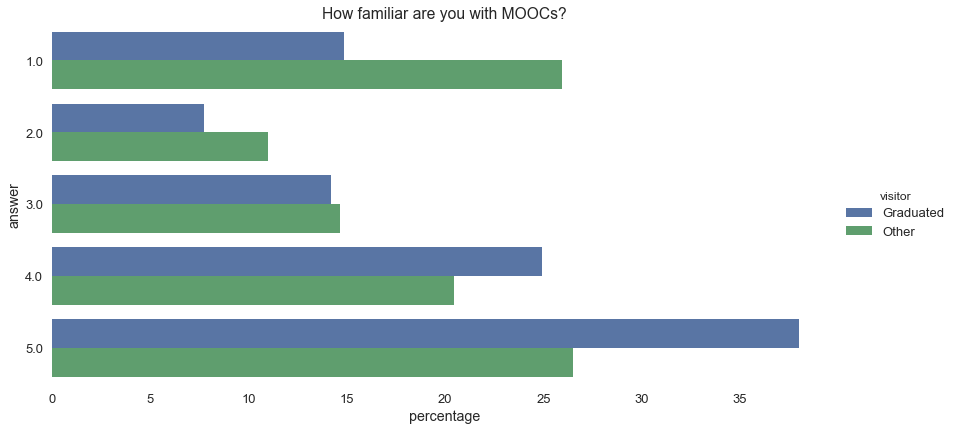

In [7]:
binary_compare_categorical_barh(mask=graduated, 
            target_name='Graduated', feature='How familiar are you with MOOCs?')

                        answer    visitor  percentage
0                       Africa  Graduated    9.463148
1      Australia / New Zealand  Graduated    3.912648
2                       Canada  Graduated    3.275705
3     Central or South America  Graduated    6.369427
4        East & Southeast Asia  Graduated    8.280255
5               Eastern Europe  Graduated    6.642402
6                        India  Graduated    8.371247
7                       Mexico  Graduated    2.820746
8               United Kingdom  Graduated    4.458599
9                United States  Graduated   29.481347
10  Western Europe (except UK)  Graduated   15.650591
11                      Africa      Other   12.356322
12     Australia / New Zealand      Other    3.520115
13                      Canada      Other    4.885057
14    Central or South America      Other    5.531609
15       East & Southeast Asia      Other    7.830460
16              Eastern Europe      Other    5.747126
17                       Ind

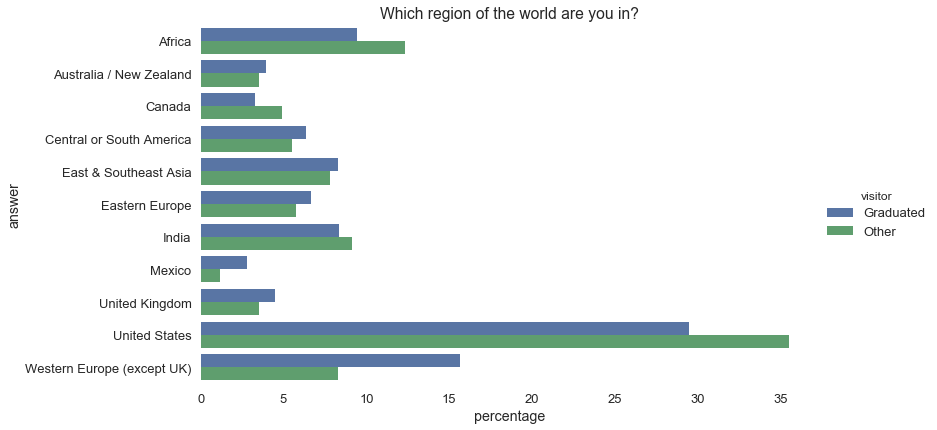

In [8]:
binary_compare_categorical_barh(mask=graduated, 
            target_name='Graduated', feature='Which region of the world are you in?')

   answer    visitor  percentage
0     1.0  Graduated   21.383076
1     2.0  Graduated   13.830755
2     3.0  Graduated   21.019108
3     4.0  Graduated   20.200182
4     5.0  Graduated   23.202912
5     1.0      Other   14.727011
6     2.0      Other   10.272989
7     3.0      Other   20.833333
8     4.0      Other   20.330460
9     5.0      Other   32.183908


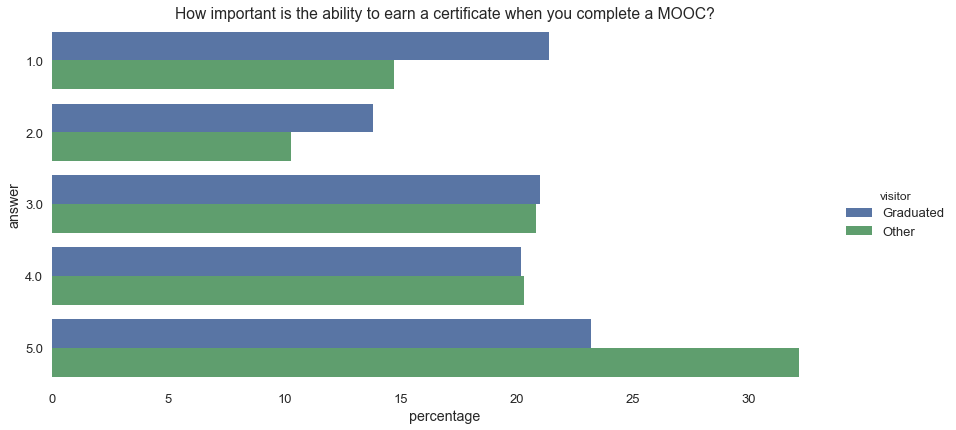

In [9]:
binary_compare_categorical_barh(mask=graduated, 
            target_name='Graduated', feature='How important is the ability to earn a certificate when you complete a MOOC?')

{'Graduated': 1099, 'Others': 1392}
      target                              select  percentage
0  Graduated       Access to reference materials   29.754322
1  Graduated  Learning skills for current career   51.774340
2  Graduated      Learning skills for new career   45.404914
3  Graduated                   Personal interest   80.982712
4  Graduated                       School credit    4.913558
5     Others       Access to reference materials   26.580460
6     Others  Learning skills for current career   50.502874
7     Others      Learning skills for new career   50.143678
8     Others                   Personal interest   77.873563
9     Others                       School credit   11.566092


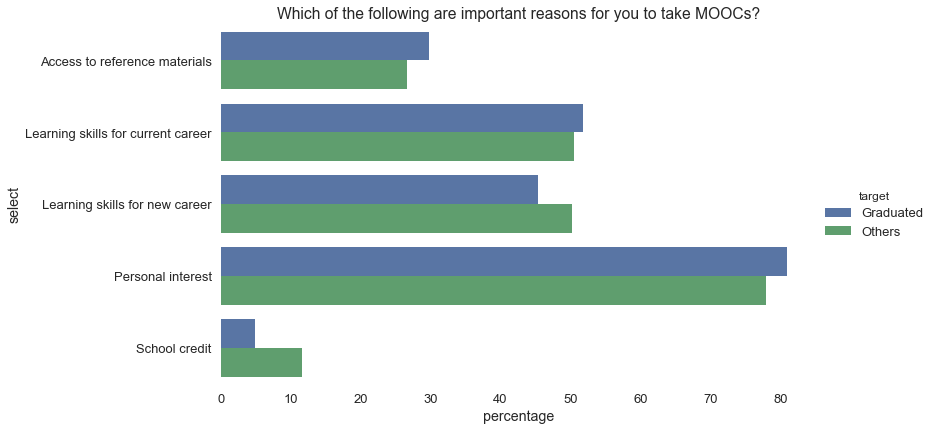

In [10]:
reasons = ['Reasons: Learning skills for current career', 'Reasons: Learning skills for new career', 
           'Reasons: School credit', 'Reasons: Personal interest', 'Reasons: Access to reference materials']
binary_compare_multi_select_categorical_barh(df, target=graduated, 
            target_name='Graduated',
            question='Which of the following are important reasons for you to take MOOCs?', 
            selectors=reasons)

{'Graduated': 1099, 'Others': 1392}
       target                  select  percentage
0   Graduated  Institution/university   44.585987
1   Graduated              Instructor   18.562329
2   Graduated  Others recommendations   23.293904
3   Graduated                Platform   27.115560
4   Graduated                 Ratings   30.937216
5   Graduated           Topic/Subject   93.994540
6      Others  Institution/university   38.649425
7      Others              Instructor   14.080460
8      Others  Others recommendations   26.795977
9      Others                Platform   27.227011
10     Others                 Ratings   34.339080
11     Others           Topic/Subject   88.793103


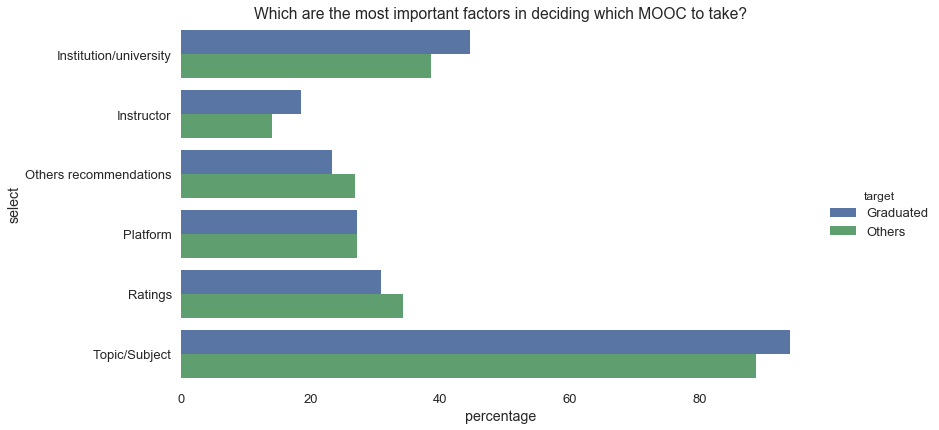

In [11]:
decisions = ['Decide: Topic/Subject', 'Decide: Instructor', 'Decide: Institution/university', 
             'Decide: Platform', 'Decide: Ratings', 'Decide: Others recommendations']
binary_compare_multi_select_categorical_barh(df, target=graduated, 
            target_name='Graduated',
            question='Which are the most important factors in deciding which MOOC to take?', 
            selectors=decisions)

{'Graduated': 1099, 'Others': 1392}
      target                                             select  percentage
0  Graduated         Actively contributing to discussion forums   32.120109
1  Graduated                         Browsing discussion forums   52.047316
2  Graduated  Connecting with learners outside the course en...   15.013649
3  Graduated  Connecting with other learners in the course e...   38.671520
4  Graduated  Taking the course with other people you know (...   13.193813
5     Others         Actively contributing to discussion forums   29.094828
6     Others                         Browsing discussion forums   55.316092
7     Others  Connecting with learners outside the course en...   15.589080
8     Others  Connecting with other learners in the course e...   38.002874
9     Others  Taking the course with other people you know (...   16.738506


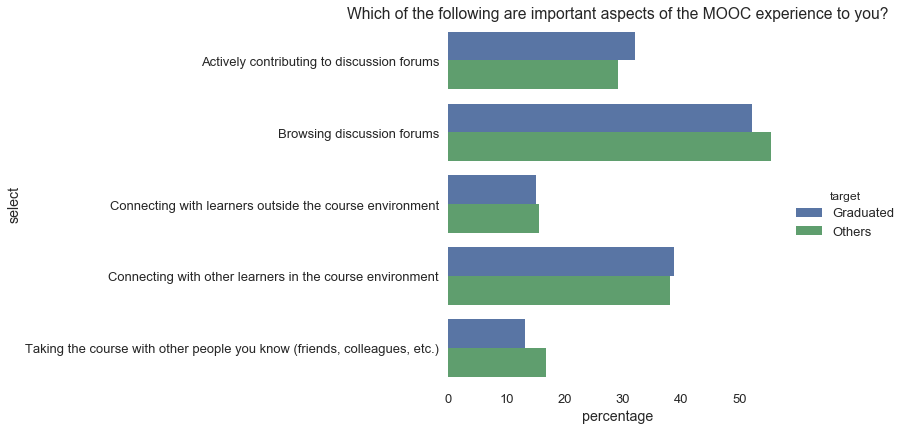

In [12]:
aspects = ['Aspects: Browsing discussion forums', 
           'Aspects: Actively contributing to discussion forums',
           'Aspects: Connecting with other learners in the course environment',
           'Aspects: Connecting with learners outside the course environment',
           'Aspects: Taking the course with other people you know (friends, colleagues, etc.)']
binary_compare_multi_select_categorical_barh(df, target=graduated, 
            target_name='Graduated',
            question='Which of the following are important aspects of the MOOC experience to you?', 
            selectors=aspects)

{'Graduated': 1099, 'Others': 1392}
       target                                        select  percentage
0   Graduated                          Have not taken MOOCs   10.919017
1   Graduated  Helped me get a new job in a different field    5.277525
2   Graduated     Helped me get a new job in the same field    5.095541
3   Graduated  Higher performance evaluation at current job   12.920837
4   Graduated                                    Not Really   35.577798
5   Graduated             Promotion at current organization    3.366697
6   Graduated                School credit towards a degree    2.547771
7      Others                          Have not taken MOOCs   20.186782
8      Others  Helped me get a new job in a different field    3.448276
9      Others     Helped me get a new job in the same field    4.741379
10     Others  Higher performance evaluation at current job   10.201149
11     Others                                    Not Really   33.692529
12     Others             Pr

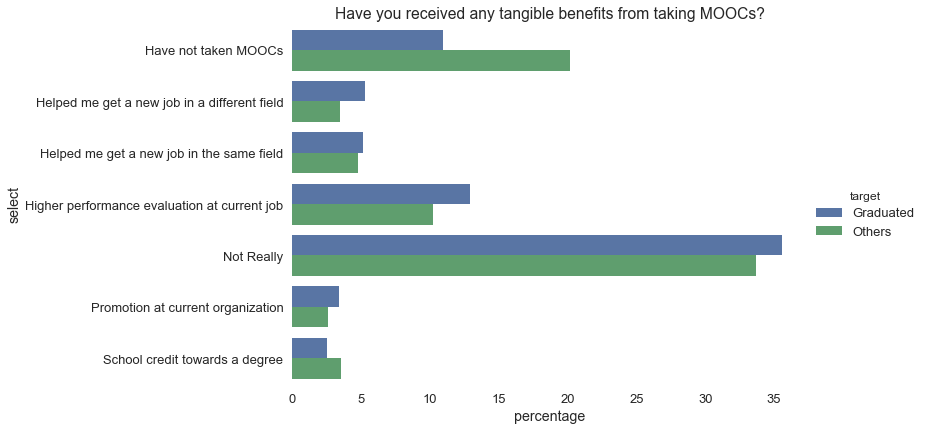

In [13]:
benefits = ['Benefit: Have not taken MOOCs', 
            'Benefit: Not Really',
            'Benefit: School credit towards a degree',
            'Benefit: Promotion at current organization',
            'Benefit: Higher performance evaluation at current job',
            'Benefit: Helped me get a new job in the same field',
            'Benefit: Helped me get a new job in a different field']
binary_compare_multi_select_categorical_barh(df, target=graduated, 
            target_name='Graduated',
            question='Have you received any tangible benefits from taking MOOCs?', 
            selectors=benefits)

{'Graduated': 1099, 'Others': 1392}
      target                                             select  percentage
0  Graduated  A multi-course certification that the MOOC is ...   23.020928
1  Graduated                       The MOOC platform being used   10.373066
2  Graduated       The institution/university offering the MOOC   42.584167
3  Graduated                           The instructor/professor   16.378526
4  Graduated                                  The topic/subject   49.772520
5     Others  A multi-course certification that the MOOC is ...   25.790230
6     Others                       The MOOC platform being used   10.919540
7     Others       The institution/university offering the MOOC   37.643678
8     Others                           The instructor/professor   12.140805
9     Others                                  The topic/subject   43.965517


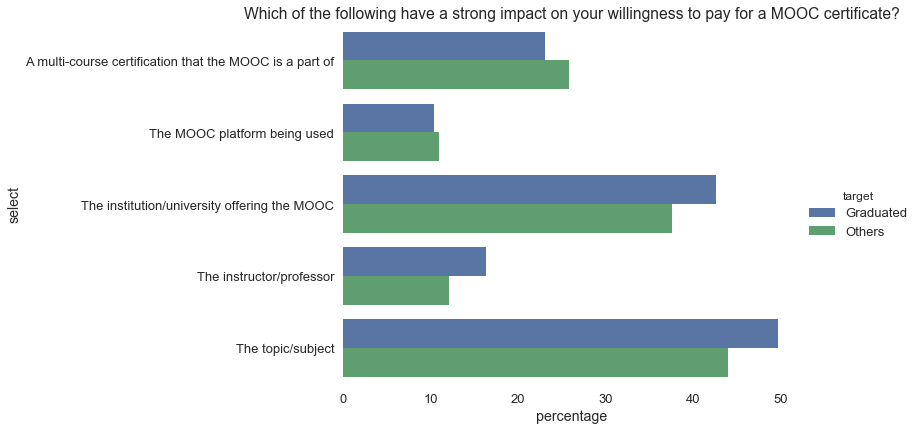

In [14]:
pays = ['Pay: The topic/subject',
        'Pay: The institution/university offering the MOOC',
        'Pay: The instructor/professor', 
        'Pay: The MOOC platform being used',
        'Pay: A multi-course certification that the MOOC is a part of']
binary_compare_multi_select_categorical_barh(df, target=graduated, 
            target_name='Graduated',
            question='Which of the following have a strong impact on your willingness to pay for a MOOC certificate?', 
            selectors=pays)

   answer    visitor  percentage
0       0  Graduated   19.745223
1       1  Graduated    8.462238
2      15  Graduated   10.555050
3     2.5  Graduated   16.469518
4      25  Graduated   12.647862
5     4.5  Graduated   15.468608
6       8  Graduated   15.286624
7       0      Other   32.399425
8       1      Other   10.632184
9      15      Other    8.548851
10    2.5      Other   15.373563
11     25      Other    8.620690
12    4.5      Other   10.129310
13      8      Other   11.637931


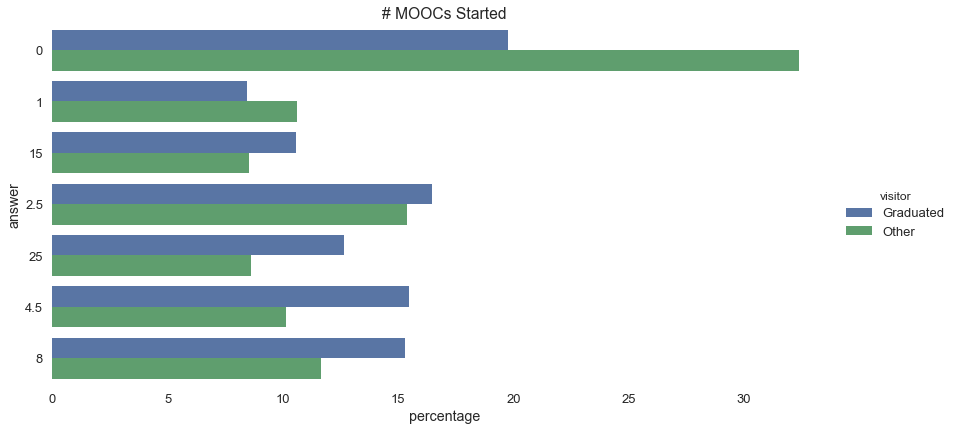

In [15]:
binary_compare_categorical_barh(mask=graduated, 
            target_name='Graduated', feature='# MOOCs Started')

   answer    visitor  percentage
0       0  Graduated   29.481347
1       1  Graduated   12.647862
2      15  Graduated    6.733394
3     2.5  Graduated   19.654231
4      25  Graduated    7.279345
5     4.5  Graduated   12.829845
6       8  Graduated    8.280255
7       0      Other   42.528736
8       1      Other   11.637931
9      15      Other    4.094828
10    2.5      Other   15.732759
11     25      Other    4.238506
12    4.5      Other    9.626437
13      8      Other    7.830460


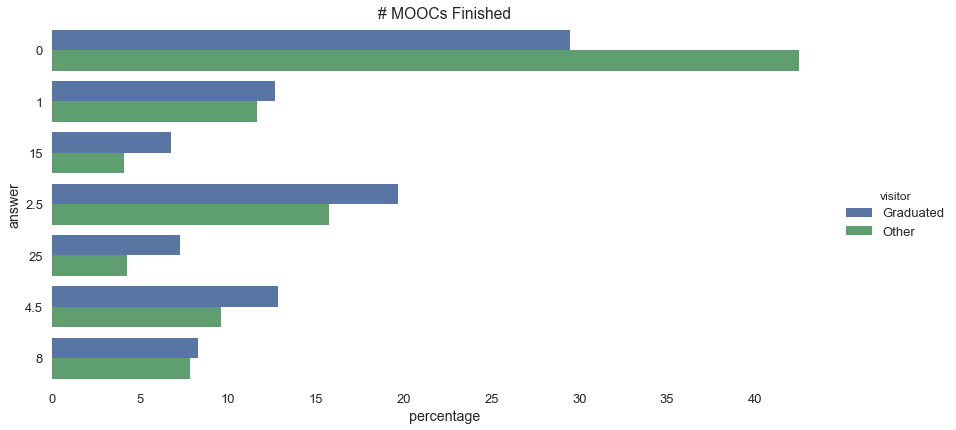

In [16]:
binary_compare_categorical_barh(mask=graduated, 
            target_name='Graduated', feature='# MOOCs Finished')

                           answer    visitor  percentage
0                   1-2 years ago  Graduated   17.652411
1                    2+ years ago  Graduated   34.667880
2          6 months to 1 year ago  Graduated   10.646042
3  I have not taken any MOOCs yet  Graduated   22.292994
4            Within past 6 months  Graduated   14.376706
5                   1-2 years ago      Other   15.876437
6                    2+ years ago      Other   20.402299
7          6 months to 1 year ago      Other   10.057471
8  I have not taken any MOOCs yet      Other   36.135057
9            Within past 6 months      Other   16.594828


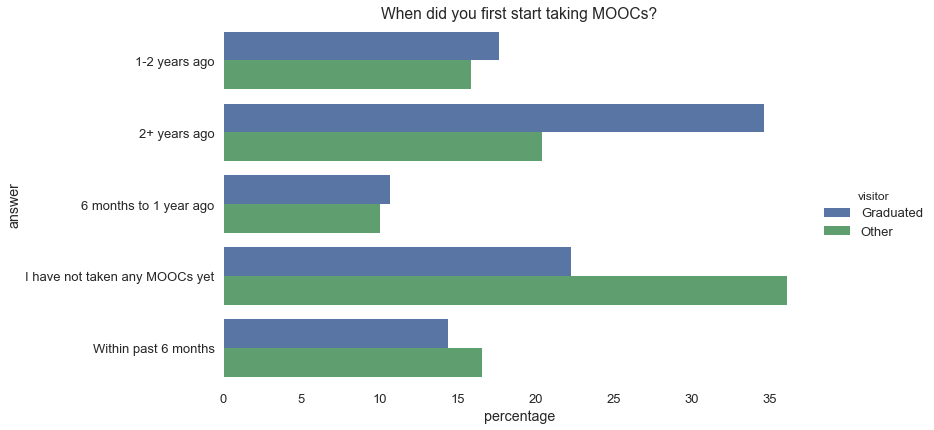

In [17]:
binary_compare_categorical_barh(mask=graduated, 
            target_name='Graduated', feature='When did you first start taking MOOCs?')

   answer    visitor  percentage
0     1.0  Graduated   11.191993
1     2.0  Graduated   21.292084
2     3.0  Graduated   37.306642
3     4.0  Graduated   15.650591
4     5.0  Graduated    9.645132
5     1.0      Other    8.620690
6     2.0      Other   18.031609
7     3.0      Other   37.859195
8     4.0      Other   18.462644
9     5.0      Other   12.356322


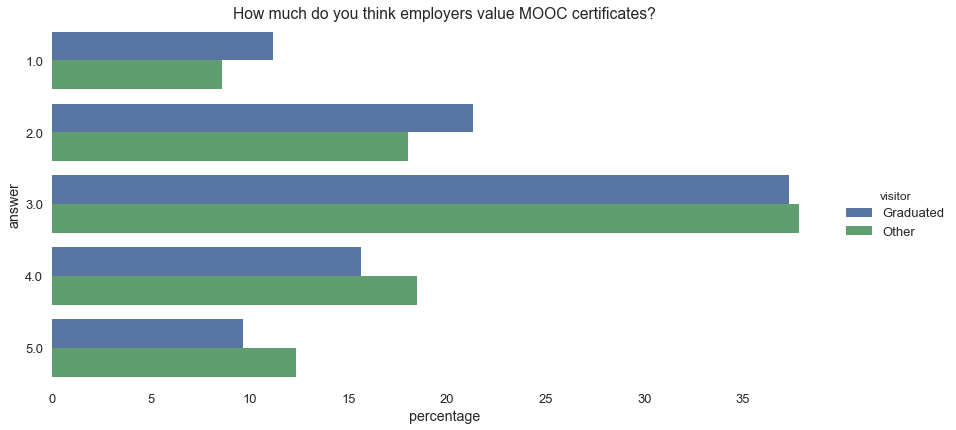

In [18]:
binary_compare_categorical_barh(mask=graduated, 
            target_name='Graduated', 
            feature='How much do you think employers value MOOC certificates?')

                         answer    visitor  percentage
0                             1  Graduated   29.026388
1                             2  Graduated   24.658781
2                             3  Graduated   27.388535
3                             4  Graduated    9.554140
4                             5  Graduated    7.825296
5   Generally not that willing.  Graduated         NaN
6                             1      Other   25.431034
7                             2      Other   23.491379
8                             3      Other   26.436782
9                             4      Other   12.068966
10                            5      Other    8.477011
11  Generally not that willing.      Other    0.071839


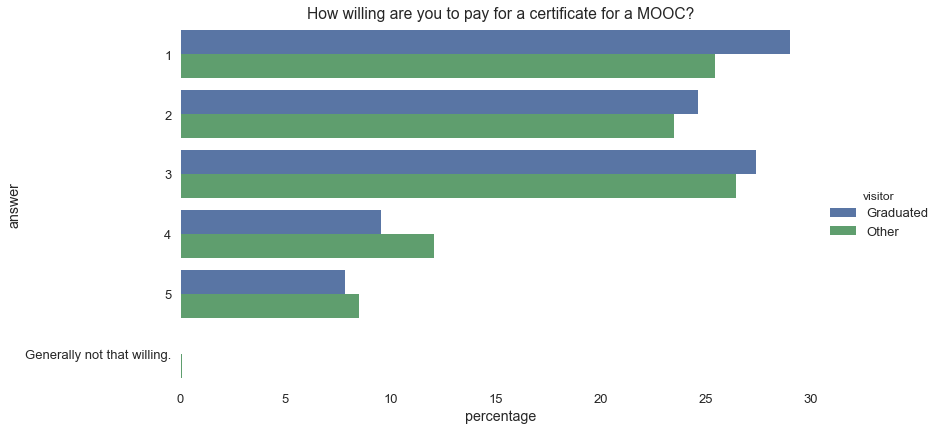

In [19]:
binary_compare_categorical_barh(mask=graduated, 
                        target_name='Graduated', feature='How willing are you to pay for a certificate for a MOOC?')

                              answer    visitor  percentage
0              2-year college degree  Graduated         NaN
1         3 or 4 year college degree  Graduated         NaN
2  Did not graduate from high school  Graduated         NaN
3             Graduate school degree  Graduated  100.000000
4                 High school degree  Graduated         NaN
5              2-year college degree      Other   14.224138
6         3 or 4 year college degree      Other   51.508621
7  Did not graduate from high school      Other    6.106322
8             Graduate school degree      Other         NaN
9                 High school degree      Other   25.359195


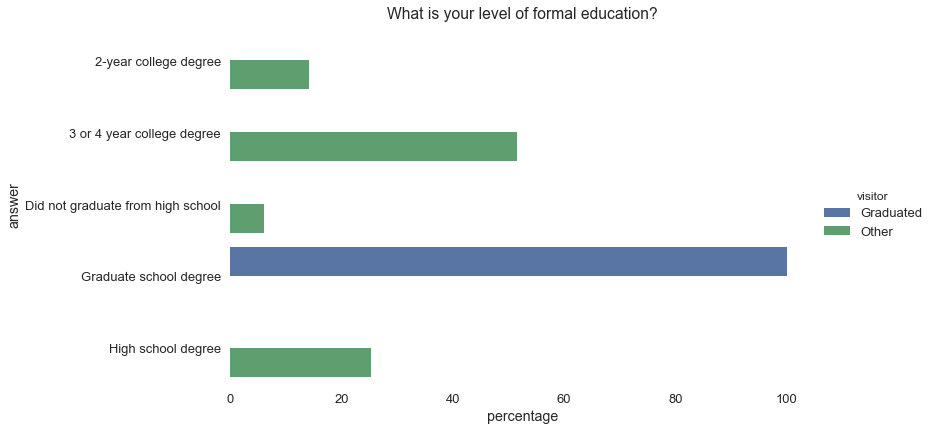

In [20]:
binary_compare_categorical_barh(mask=graduated, 
            target_name='Graduated', 
            feature='What is your level of formal education?')

             answer    visitor  percentage
0   10-17 years old  Graduated    0.272975
1   18-21 years old  Graduated    1.364877
2   22-25 years old  Graduated    5.823476
3   26-29 years old  Graduated    8.735214
4   30-35 years old  Graduated   10.009099
5   36-45 years old  Graduated   19.108280
6   46-55 years old  Graduated   21.110100
7   56-65 years old  Graduated   18.653321
8     66+ years old  Graduated   14.467698
9   10-17 years old      Other    3.448276
10  18-21 years old      Other   11.566092
11  22-25 years old      Other    9.985632
12  26-29 years old      Other    7.399425
13  30-35 years old      Other   10.272989
14  36-45 years old      Other   15.086207
15  46-55 years old      Other   17.456897
16  56-65 years old      Other   14.152299
17    66+ years old      Other    9.051724


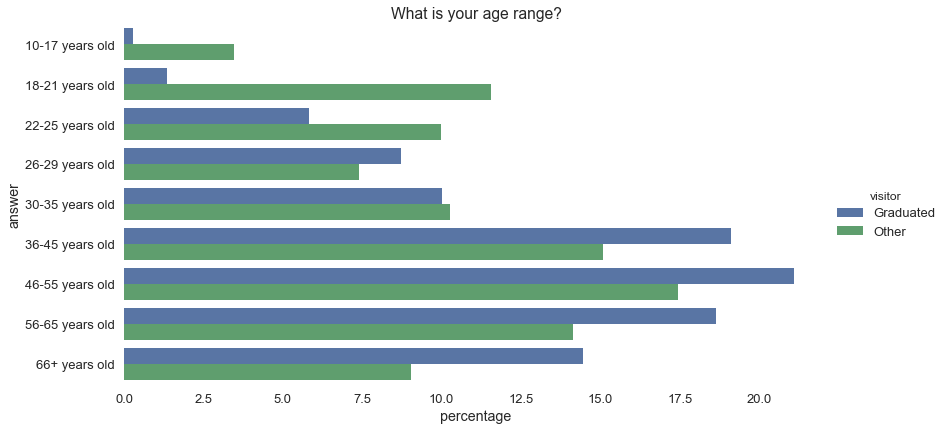

In [21]:
binary_compare_categorical_barh(mask=graduated, 
            target_name='Graduated', 
            feature='What is your age range?')